## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [ ]:
import math
import io

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [ ]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [ ]:
pop = pd.read_csv('data/grades.csv')

In [ ]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


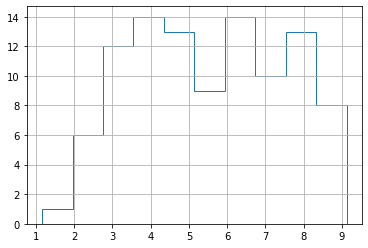

In [ ]:
pop.grade.hist(histtype='step')

In [ ]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [ ]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.377283
std,1.889574
min,1.987371
25%,3.920676
50%,4.964791
75%,7.138937
max,9.120705


In [ ]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

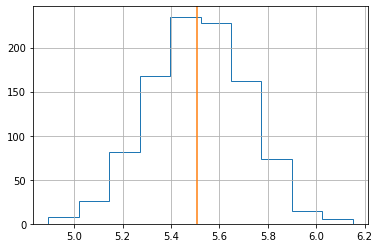

In [ ]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

In [ ]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.12052943255063, 5.87291415716844)

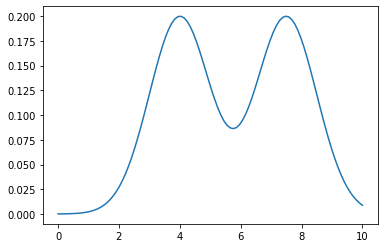

In [ ]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [ ]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [ ]:
draw()

3.249741573351716

In [ ]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

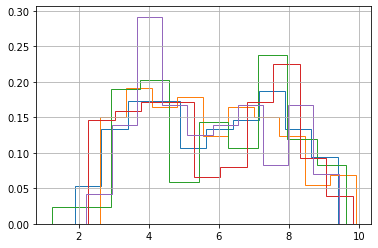

In [ ]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [ ]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

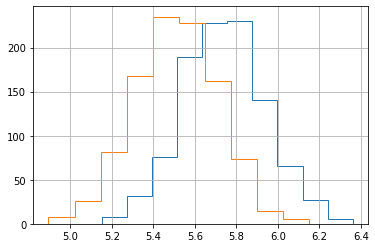

In [ ]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')